In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = np.array((32,32.04,32.08,32.04,32,32.04,32.24,32.28,32.04,32.16,32.08,32.04,32.2,32.16,32.12,32.2,32.24,32.16,32.2,32.24,32.16,32.08,32.12,32.2))
df = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
df.head()

,Xbar
0,32.00
1,32.04
2,32.08
3,32.04
4,32.00


In [2]:
sigma_xbar=0.22
mean_xbar=32.15
n=5
ARL=500
alpha=1/ARL
K_alpha=stats.norm.ppf(1-alpha/2)

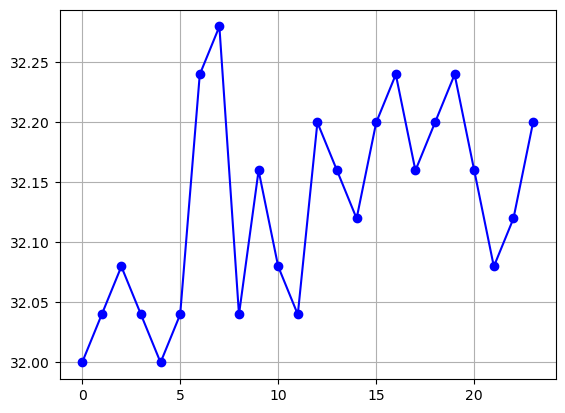

In [3]:
# Plot the data first
plt.plot(df, color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.210


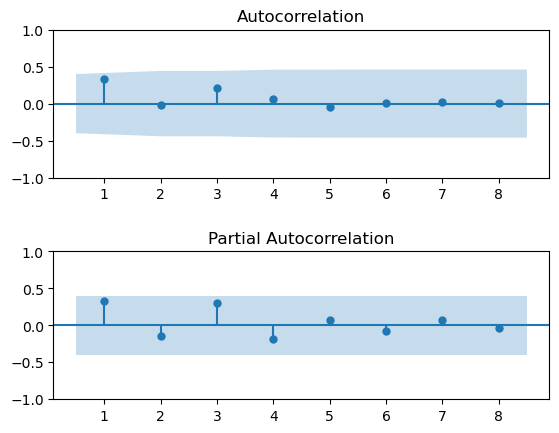

In [4]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(df['Xbar'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


Shapiro-Wilk test p-value = 0.120


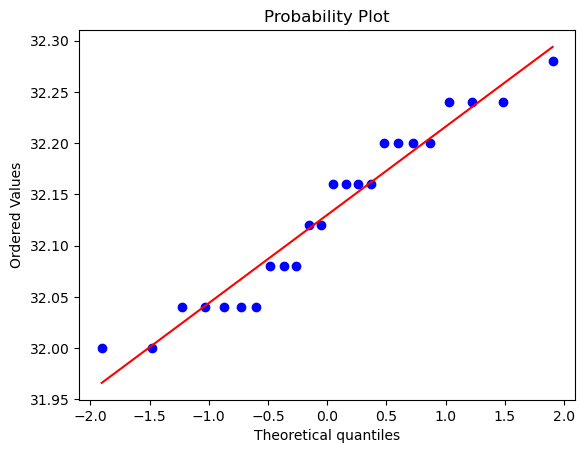

In [5]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df['Xbar'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)
# Plot the qqplot
stats.probplot(df['Xbar'], dist="norm", plot=plt)
plt.show()

In [6]:
# Now we can compute the CL, UCL and LCL for Xbar and R
df['Xbar_CL'] = mean_xbar
df['Xbar_UCL'] = mean_xbar + K_alpha * sigma_xbar
df['Xbar_LCL'] = mean_xbar - K_alpha * sigma_xbar

df['Xbar_TEST1'] = np.where((df['Xbar'] > df['Xbar_UCL']) | 
                (df['Xbar'] < df['Xbar_LCL']), df['Xbar'], np.nan)

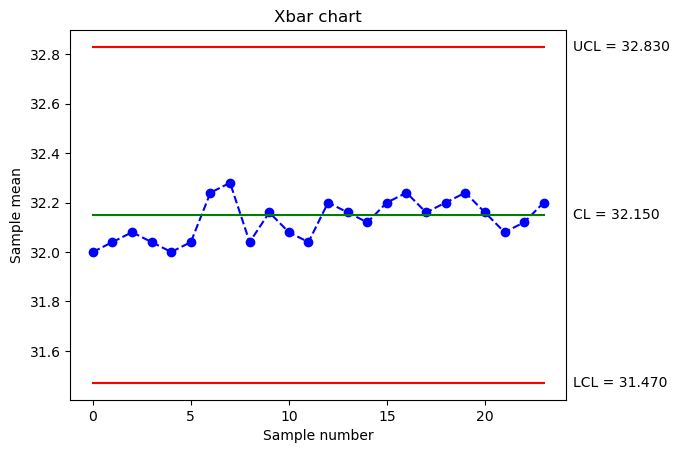

In [7]:
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(df['Xbar'], color='b', linestyle='--', marker='o')
plt.plot(df['Xbar_UCL'], color='r')
plt.plot(df['Xbar_CL'], color='g')
plt.plot(df['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(df['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(df['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(df['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

>## Point 2

In [9]:
std=df['Xbar'].std()
chi2_test=(len(data)-1)*std*std/(sigma_xbar*sigma_xbar)
chi2_upper=stats.chi2.ppf(0.05/2,len(data)-1)
chi2_lower=stats.chi2.ppf(1-0.05/2,len(data)-1)

>## Point 3

In [12]:
# Now we can compute the CL, UCL and LCL for Xbar and R
data_X= pd.DataFrame(data, columns = ['Xbar'])
data_X['Xbar_CL'] = mean_xbar
data_X['Xbar_UCL'] = mean_xbar + K_alpha * std
data_X['Xbar_LCL'] = mean_xbar - K_alpha * std

data_X['Xbar_TEST1'] = np.where((data_X['Xbar'] > data_X['Xbar_UCL']) | 
                (data_X['Xbar'] < data_X['Xbar_LCL']), data_X['Xbar'], np.nan)

data_X.head()


,Xbar,Xbar_CL,Xbar_UCL,Xbar_LCL,Xbar_TEST1
0,32.00,32.15,32.410945,31.889055,NaN
1,32.04,32.15,32.410945,31.889055,NaN
2,32.08,32.15,32.410945,31.889055,NaN
3,32.04,32.15,32.410945,31.889055,NaN
4,32.00,32.15,32.410945,31.889055,NaN


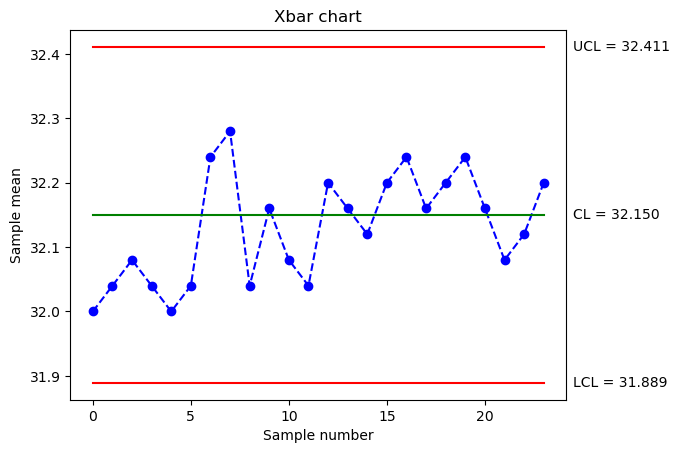

In [13]:
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_X['Xbar'], color='b', linestyle='--', marker='o')
plt.plot(data_X['Xbar_UCL'], color='r')
plt.plot(data_X['Xbar_CL'], color='g')
plt.plot(data_X['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_X)+.5, data_X['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_X['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_X)+.5, data_X['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_X['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_X)+.5, data_X['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_X['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_X['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()